<a href="https://colab.research.google.com/github/komalsursawant029/Play_Store_Analysis/blob/main/First_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
f=open("/content/drive/MyDrive/image.png")
print(f)

<_io.TextIOWrapper name='/content/drive/MyDrive/image.png' mode='r' encoding='UTF-8'>


In [ ]:
from google.colab import files
from IPython.display import Image
uploaded =files.upload()

Saving image2.jpg to image2 (1).jpg


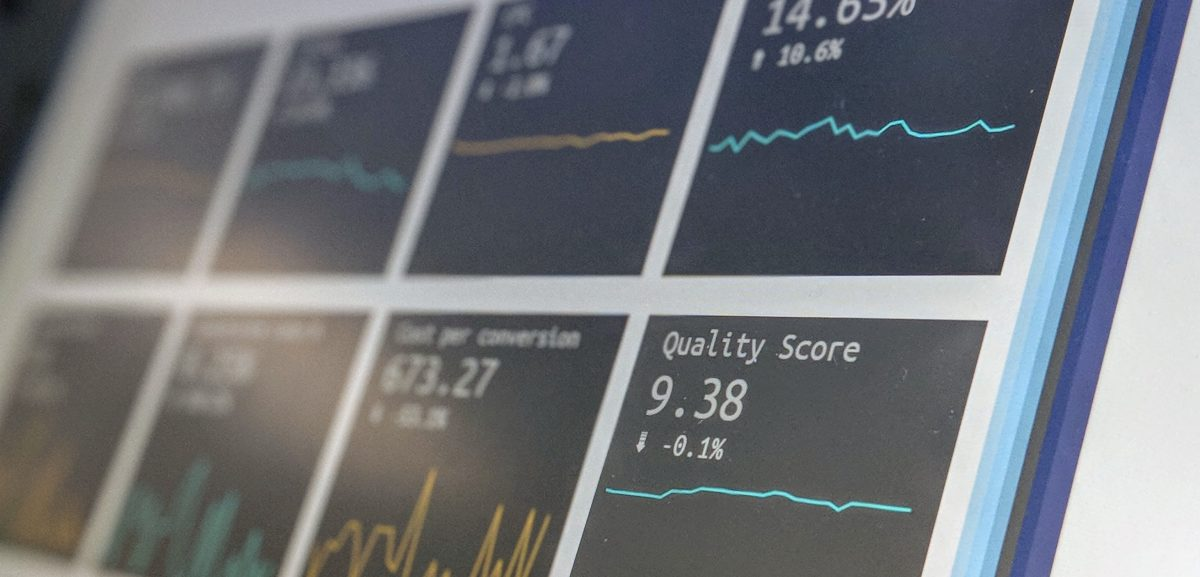

In [ ]:
Image('image2.jpg',
      width= 1000)

We investigate the different variables of Apps on Google Play Store that affect the application and the top most relevant user reviews. We attempt to use our analysis to answer the following questions:

What makes an app popular?
What are some interesting trends that we can observe about user behaviour & sentiment on app usage?
Can we predict app popularity if given a set of features about the app?
Prediction of app popularity to gauge revenue generated & optimize investment strategy for app development

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PlayStore_Data.csv")

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# show shape of df
df.shape

(9360, 10)

In [ ]:
#top rows 
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [ ]:
#return last rows
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle


In [ ]:
# showing index info
df.index


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10828, 10829, 10830, 10832, 10833, 10834, 10836, 10837, 10839,
            10840],
           dtype='int64', length=9360)

In [ ]:
#columns name 
df.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres'],
      dtype='object')

# Data Cleaning:-

In [ ]:
#missing value in data
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10834,False,False,False,False,False,False,False,False,False,False
10836,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False


In [ ]:
#number of missing values in data
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [ ]:
#does not have any value
df[df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres


In [ ]:
df.dropna(subset = ['Content Rating'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
modeValueRating = df['Rating'].mode()

In [ ]:
df['Rating'].fillna(value=modeValueRating[0], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#description of the data
df.describe()


,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [ ]:
df.value_counts()


App                                                 Category          Rating  Reviews  Size                Installs      Type  Price  Content Rating  Genres        
Skyscanner                                          TRAVEL_AND_LOCAL  4.5     481546   29M                 10,000,000+   Free  0      Everyone        Travel & Local    4
Google Keep                                         PRODUCTIVITY      4.4     691474   Varies with device  100,000,000+  Free  0      Everyone        Productivity      4
CBS Sports App - Scores, News, Stats & Watch Live   SPORTS            4.3     91031    Varies with device  5,000,000+    Free  0      Everyone        Sports            4
WatchESPN                                           SPORTS            4.1     288809   6.6M                10,000,000+   Free  0      Everyone        Sports            4
eBay: Buy & Sell this Summer - Discover Deals Now!  SHOPPING          4.4     2788923  Varies with device  100,000,000+  Free  0      Teen            Shopp

In [ ]:
#find pairwise correlation of  col
df.corr()


,Rating
Rating,1.0


# Analysis Categories :-

In [ ]:
#category analysis
df['Category']


0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10834                 FAMILY
10836                 FAMILY
10837                 FAMILY
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 9360, dtype: object

In [ ]:
#category unique element
df['Category'].unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
#how many time same category occur
count_category=pd.DataFrame(df['Category']).value_counts()
print('name                 count')
print(count_category)

name                 count
Category           
FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
dtype: int64


From this we can see Top categories  

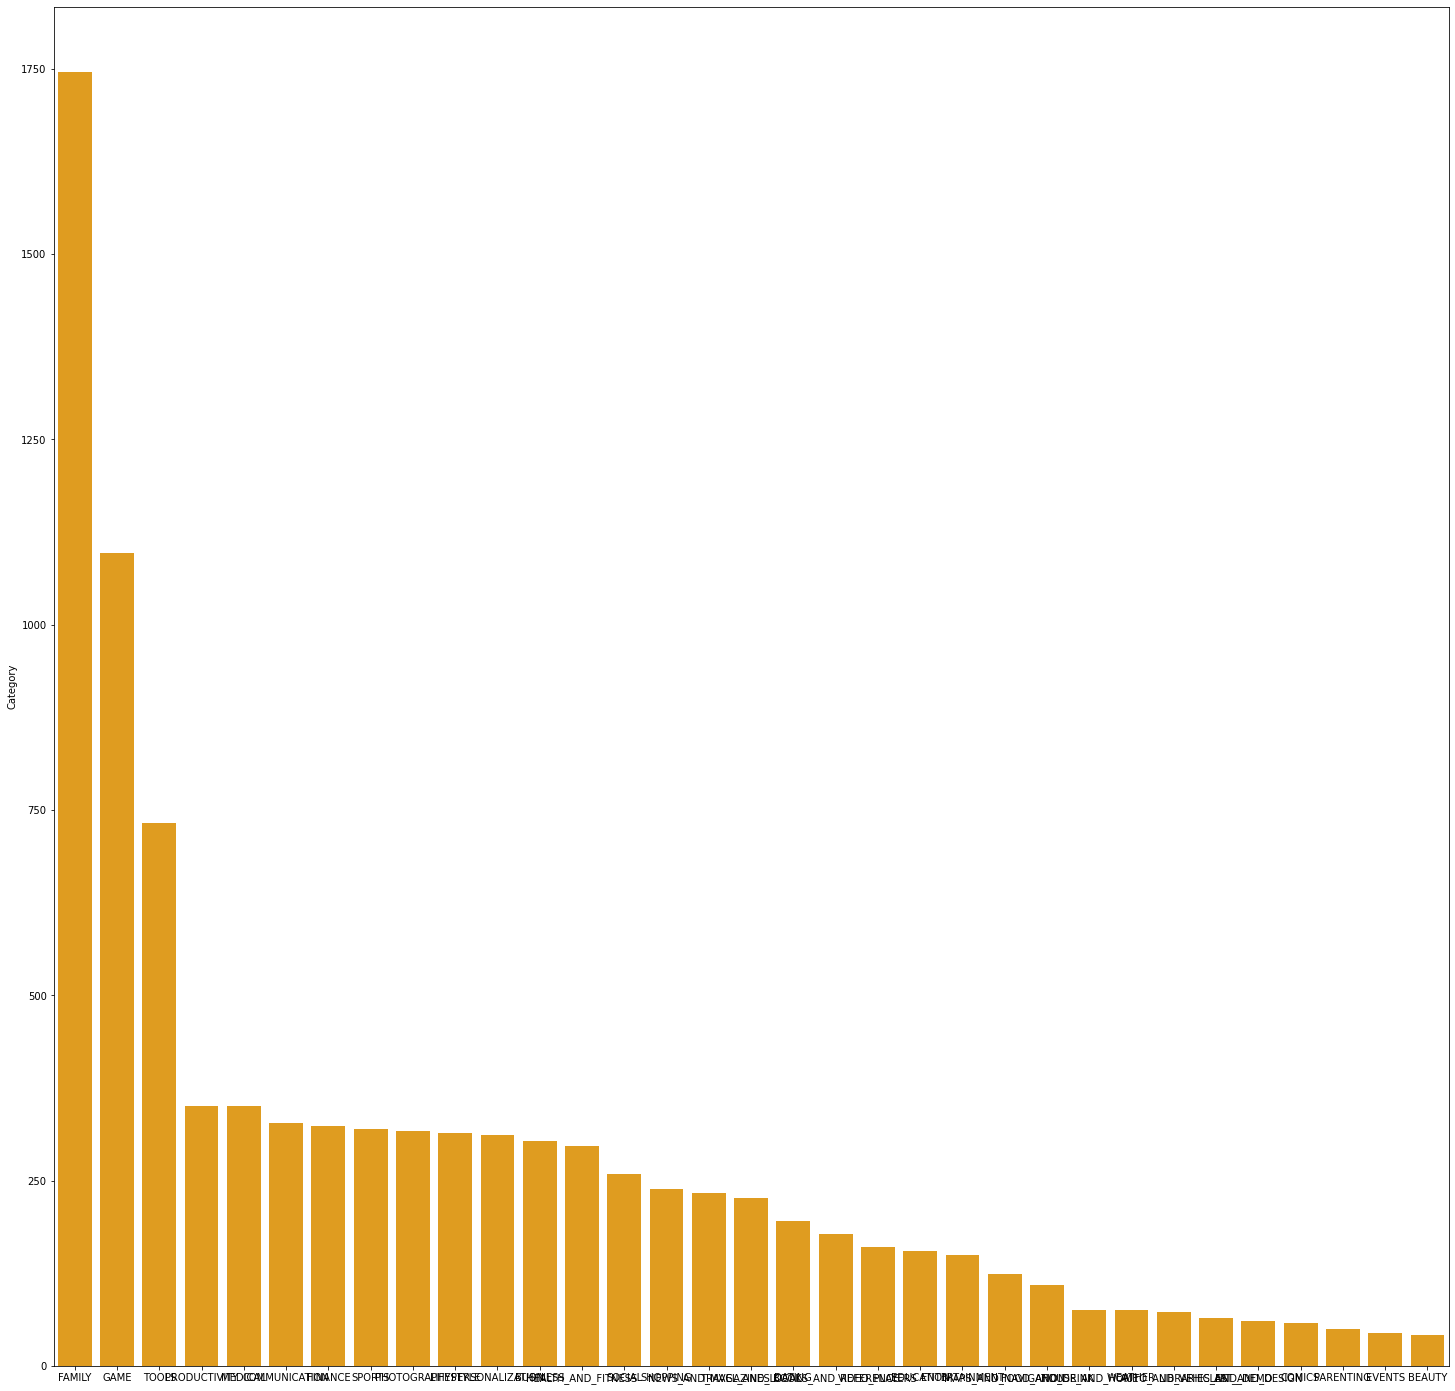

In [ ]:
plt.figure(figsize=(25,25))
most_cat = df.Category.value_counts()
c="orange"
sns.barplot(x=most_cat.index, y=most_cat, data=df,color=c)

In [ ]:
max_val=df['Category'].max()


In [ ]:
max_val

'WEATHER'

#Rating:-

In [ ]:
#Rating
rat=df['Rating']


In [ ]:
rat.head()


0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

Top Apps which get five star rating

In [ ]:
#top apps which get five star rating
star_rating=df[df['Rating']==5]
print(star_rating)
print(star_rating.shape)


                                              App   Category  Rating Reviews  \
329                  Hojiboy Tojiboyev Life Hacks     COMICS     5.0      15   
612                 American Girls Mobile Numbers     DATING     5.0       5   
615                                  Awake Dating     DATING     5.0       2   
633                         Spine- The dating app     DATING     5.0       5   
636    Girls Live Talk - Free Text and Video Chat     DATING     5.0       6   
...                                           ...        ...     ...     ...   
10721                           Mad Dash Fo' Cash       GAME     5.0      14   
10742                       GKPB FP Online Church  LIFESTYLE     5.0      32   
10776                            Monster Ride Pro       GAME     5.0       1   
10820                             Fr. Daoud Lamei     FAMILY     5.0      22   
10837            Fr. Mike Schmitz Audio Teachings     FAMILY     5.0       4   

       Size Installs  Type Price Conten

In [ ]:
print(star_rating.value_counts())

App                                Category            Rating  Reviews  Size  Installs  Type  Price  Content Rating  Genres          
420 BZ Budeze Delivery             MEDICAL             5.0     2        11M   100+      Free  0      Mature 17+      Medical             2
BP Journal - Blood Pressure Diary  MEDICAL             5.0     6        26M   1,000+    Free  0      Everyone        Medical             2
Sway Medical                       MEDICAL             5.0     3        22M   100+      Free  0      Everyone        Medical             2
211:CK                             GAME                5.0     8        38M   10+       Paid  $0.99  Teen            Arcade              1
Galaxies of Hope                   MEDICAL             5.0     2        24M   50+       Free  0      Everyone        Medical             1
                                                                                                                                        ..
Chronolink DX                   

274 apps having five star rating

In [ ]:
star_rating.shape

(274, 10)

In [ ]:
#create two data frame show how many people paid for apps
Is_great=df[df['Rating']>=4]
Is_less=df[df['Rating']>=4 & (df['Type']=='Free')]

In [ ]:
print(Is_great.shape)
print(Is_less.shape)

(7363, 10)
(9360, 10)


number of difference between paid  and free ..the difference between them is not large that means people also select paid app   

In [ ]:
#Tests element wise wheather it is NaN or not
c=np.isnan(df['Rating'])

In [ ]:
c

0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839    False
10840    False
Name: Rating, Length: 9360, dtype: bool

In [ ]:
k=df["Rating"].reset_index(drop=True)

In [ ]:
type(k)

pandas.core.series.Series

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


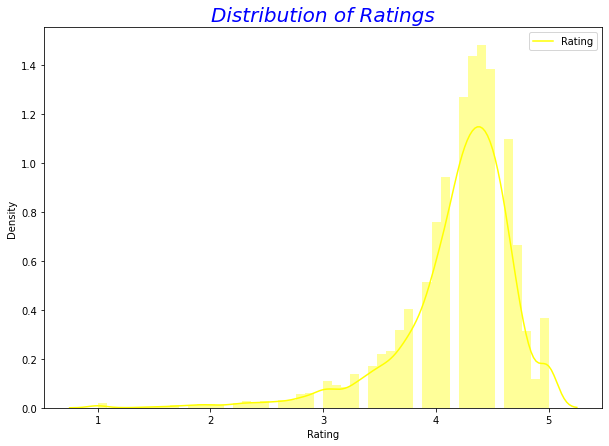

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(df['Rating'],color = 'yellow')
plt.title('Distribution of Ratings',color="blue",fontsize=20,fontstyle='italic')
plt.legend(['Rating'])
plt.show()

# Size:-

 Drop the Rows of the column Size having Nanvalues

In [ ]:
df.dropna(subset = ['Size'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64


In [ ]:
d=pd.DataFrame(df['Size']).value_counts()
print(d)

Size              
Varies with device    1637
14M                    165
12M                    161
11M                    159
15M                    159
                      ... 
656k                     1
309k                     1
308k                     1
676k                     1
506k                     1
Length: 413, dtype: int64


In [ ]:
topAppsinsize=df['Size'].value_counts().head(50)


In [ ]:
x3sis = []
y3sis = []

for i in range(len(topAppsinsize)):
    x3sis.append(topAppsinsize.index[i])
    y3sis.append(topAppsinsize[i])

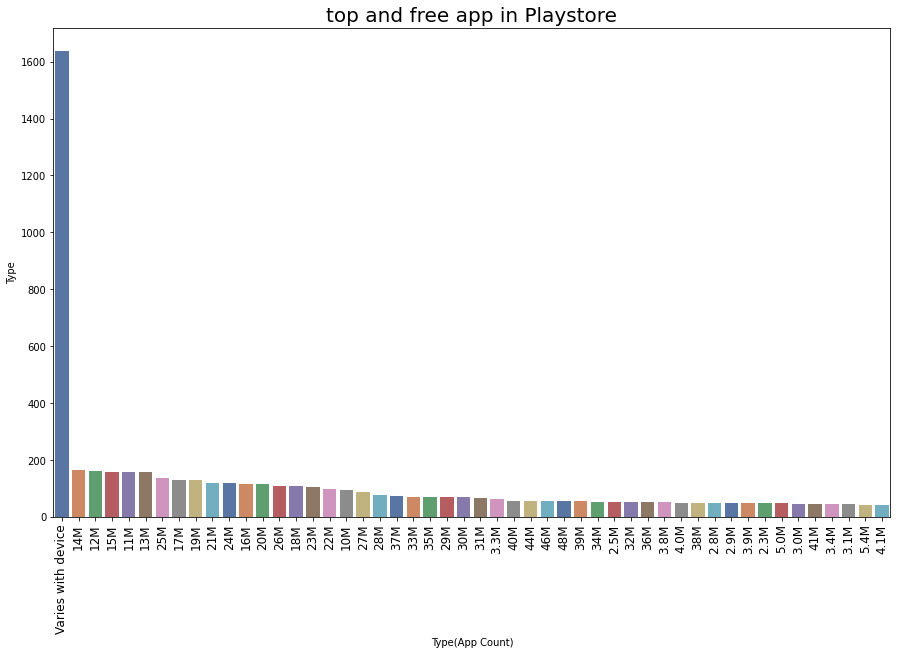

In [ ]:
plt.figure(figsize=(15,9))
plt.ylabel('Type')
plt.xlabel('Type(App Count)')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("top and free app in Playstore", fontsize = 20);

# Installs:-

In [ ]:
#now lets analysis install
df['Installs'] 


0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9360, dtype: object

In [ ]:
df['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
df['Installs'].dtype

dtype('O')

In [ ]:
df['Installs'] 


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: object

In [ ]:
install_count=(df['Installs']).value_counts()


In [ ]:
install_count

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [ ]:
type(install_count)

pandas.core.series.Series

In [ ]:
I_C=pd.DataFrame(["install_count"])
I_C2=I_C.groupby(['install_count']).size().reset_index(name="Time")

In [ ]:
I_C2

,index,Time
0,install_count,1


In [ ]:
df.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1'], dtype=object)

#Type:-

In [ ]:
#analyzing type
count1=(df['Type']=='Free').value_counts()
count2=(df['Type']=='Paid').value_counts()

In [ ]:
# number of people paid for app and number of people use free app
print(count1)
print(count2)

True     8715
False     645
Name: Type, dtype: int64
False    8715
True      645
Name: Type, dtype: int64


In [ ]:
topAppsininstall=df['Type'].value_counts().head(50)


In [ ]:
x3sis = []
y3sis = []

for i in range(len(topAppsininstall)):
    x3sis.append(topAppsininstall.index[i])
    y3sis.append(topAppsininstall[i])

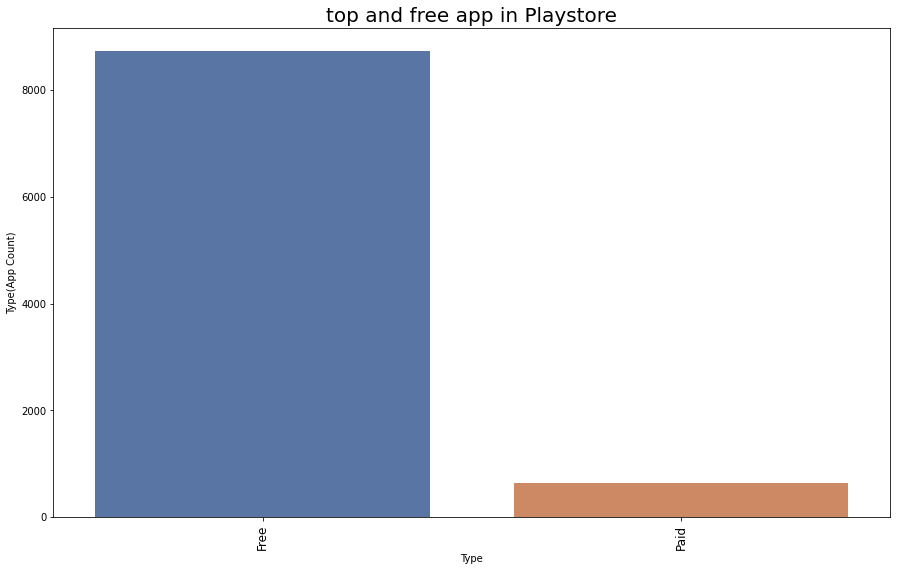

In [ ]:
plt.figure(figsize=(15,9))
plt.ylabel('Type(App Count)')
plt.xlabel('Type')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("top and free app in Playstore", fontsize = 20);

#Price:-

In [ ]:
h=(df['Price']!="0").value_counts()
print('value of paid app:',h)
w=(df['Price']=='0').value_counts()
print('value of free app:',w)

value of paid app: False    8715
True      645
Name: Price, dtype: int64
value of free app: True     8715
False     645
Name: Price, dtype: int64


In [ ]:
df3=df[df['Rating']==5 & (df['Type']=='Paid')]
df4=df[df['Rating']==5 & (df['Type']=='Free')]


In [ ]:
print(df.iloc[:,:2].head())

                                                 App        Category
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN
1                                Coloring book moana  ART_AND_DESIGN
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN
3                              Sketch - Draw & Paint  ART_AND_DESIGN
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN


In [ ]:
df3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4127,Speech Therapy: F,FAMILY,1.0,1,16M,10,Paid,$2.99,Everyone,Education
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.0M,50,Paid,$1.49,Everyone,Education


In [ ]:
df4

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
625,House party - live chat,DATING,1.0,1,9.2M,10,Free,0,Mature 17+,Dating
5151,Clarksburg AH,MEDICAL,1.0,1,28M,50,Free,0,Everyone,Medical
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.9M,1000,Free,0,Everyone,Card
6490,MbH BM,MEDICAL,1.0,1,2.3M,100,Free,0,Everyone,Medical
7144,CB Mobile Biz,FINANCE,1.0,3,8.4M,500,Free,0,Everyone,Finance
7383,Thistletown CI,PRODUCTIVITY,1.0,1,6.6M,100,Free,0,Everyone,Productivity
7427,CJ DVD Rentals,COMMUNICATION,1.0,5,13M,100,Free,0,Everyone,Communication
7806,CR Magazine,BUSINESS,1.0,1,7.8M,100,Free,0,Everyone,Business
7926,Tech CU Card Manager,FINANCE,1.0,2,7.2M,1000,Free,0,Everyone,Finance
8820,DS Creator 2.0,TOOLS,1.0,2,4.4M,500,Free,0,Everyone,Tools


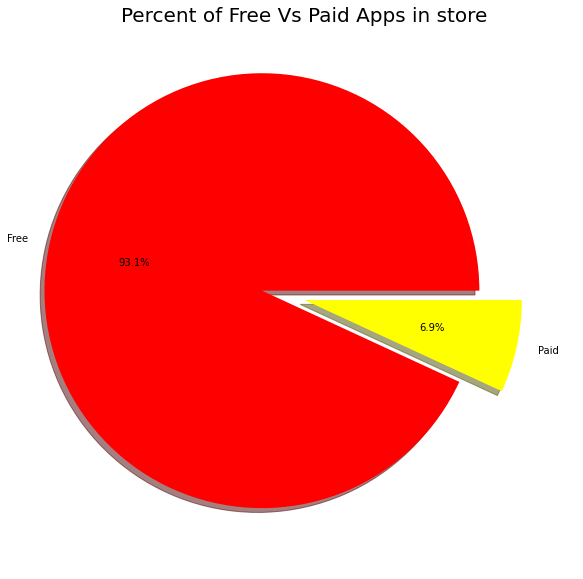

In [ ]:
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["red","yellow"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

#content Rating:-

In [ ]:
#content rating
count_R=df['Content Rating'].unique()
print(count_R)

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


In [ ]:
df['Content Rating'].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [ ]:
topAppsininstall=df['Content Rating'].value_counts().head(50)


In [ ]:
x3sis = []
y3sis = []

for i in range(len(topAppsininstall)):
    x3sis.append(topAppsininstall.index[i])
    y3sis.append(topAppsininstall[i])

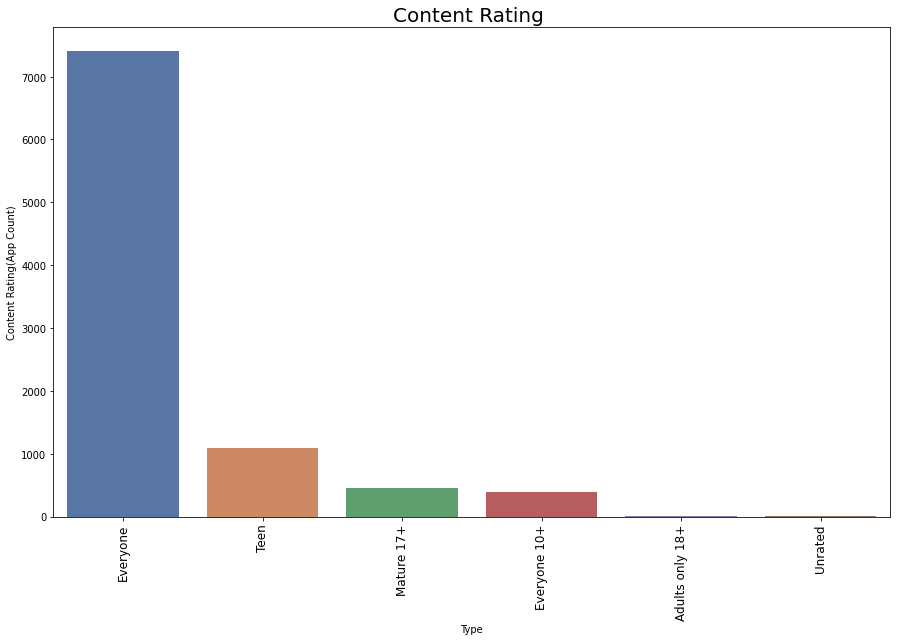

In [ ]:
plt.figure(figsize=(15,9))
plt.ylabel('Content Rating(App Count)')
plt.xlabel('Type')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Content Rating ", fontsize = 20);

# Genres:-

In [ ]:
#genres
count2=(df['Genres']).value_counts()

In [ ]:
count2.head()

Tools            732
Entertainment    533
Education        468
Action           358
Productivity     351
Name: Genres, dtype: int64

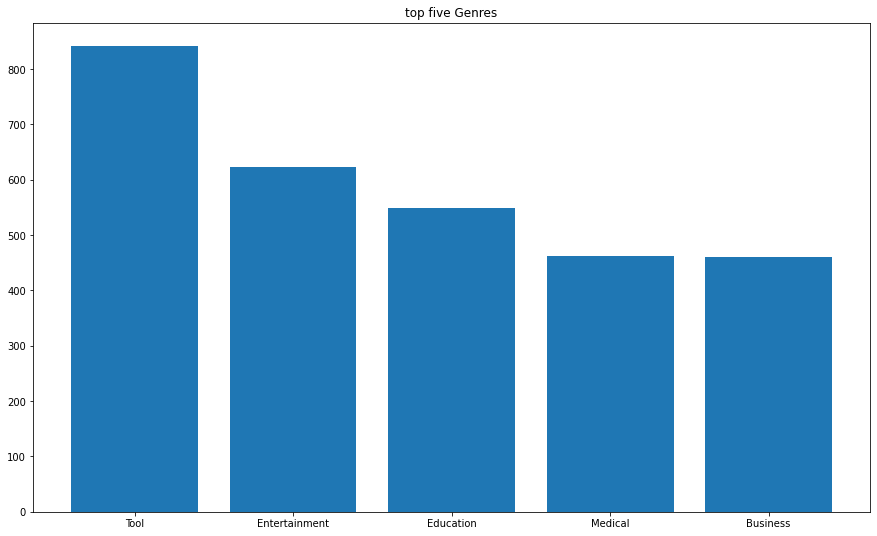

In [ ]:
plt.figure(figsize=(15,9))
a=[842,623,549,463,460]
b=['Tool','Entertainment','Education','Medical','Business']
plt.bar(b,a)
plt.title(label="top five Genres")
plt.show()

Tool,Entertainment, Education,Madical,Business are Top five genres 

In [ ]:
from google.colab import files
from IPython.display import Image
uploaded =files.upload()

Saving image1.png to image1.png


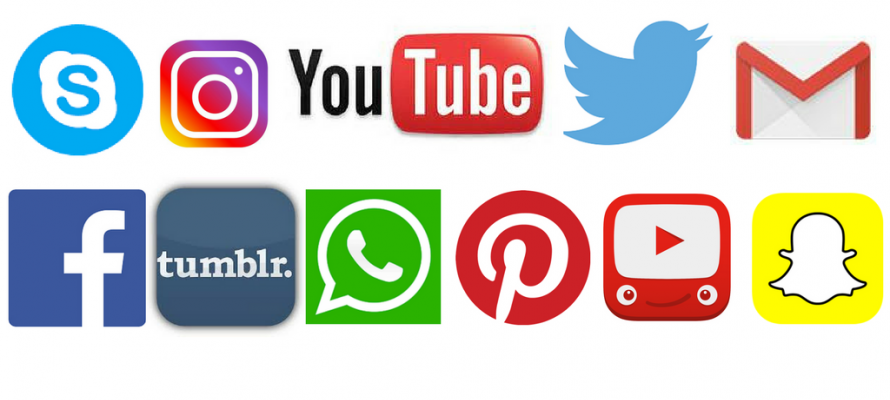

In [ ]:
Image('image1.png',
      width= 1000)

#Installs and Categories:-

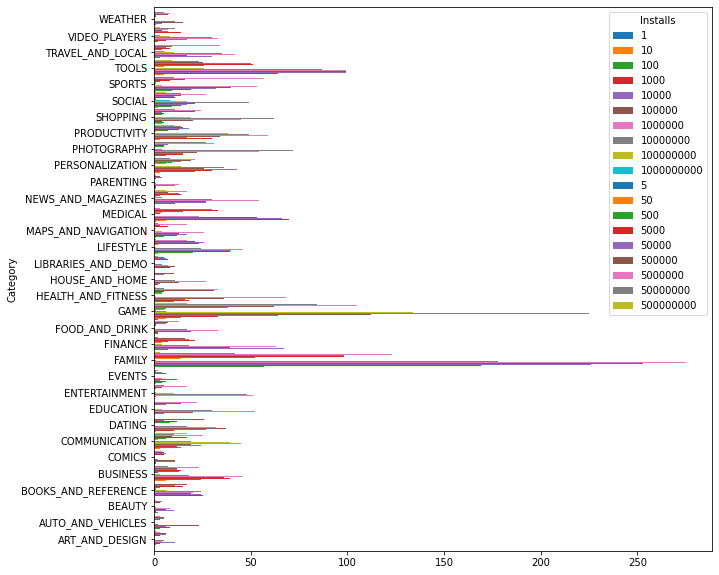

In [ ]:
(df.groupby('Category')['Installs'].value_counts())
Type_cat = df.groupby('Category')['Installs'].value_counts().unstack().plot.barh(figsize=(10,10), width=1)
plt.show()

family category has the most installs app on the google play store

#Categories and Rating:-

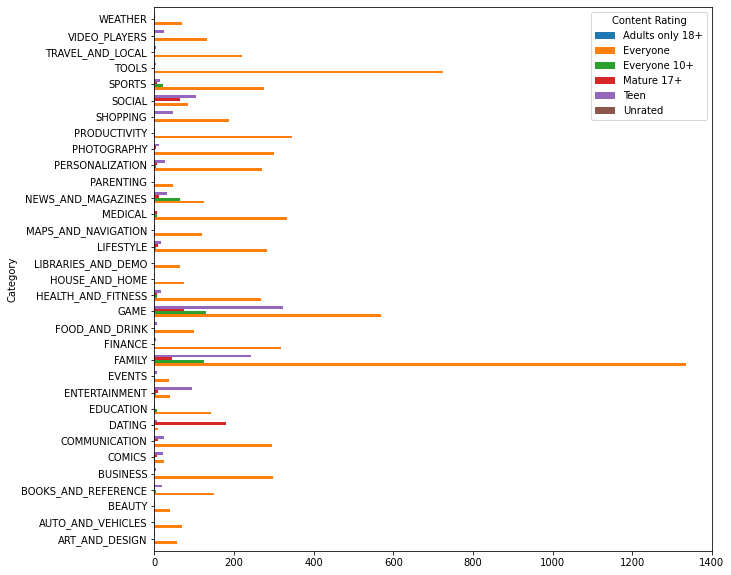

In [ ]:
(df.groupby('Category')['Content Rating'].value_counts())
Type_cat = df.groupby('Category')['Content Rating'].value_counts().unstack().plot.barh(figsize=(10,10), width=1)
plt.show()

Graph show rating wise  category

In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Reviews.csv")

In [ ]:
df2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
df2.shape

(64295, 5)

In [ ]:
df2['Translated_Review'].unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis', nan, ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [ ]:
df2.isnull()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,True,True,True
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
64290,False,True,True,True,True
64291,False,True,True,True,True
64292,False,True,True,True,True
64293,False,True,True,True,True


Q: Which app category is currently the most popular?
Q:Which category App’s have the most number of installs?
Q:What are the Top 10 installed apps in any category?
q:What are the count of Apps in different genres?
Q:How many apps were installed according to its type?

conclusion:-Family, Personalization and Medical categories had the biggest number of paid apps available for download.:-The difference in the plot between free and paid apps seems to be low.:-Maximum number of apps present in google play store comes under Family, Games and Tools Category but as per the installations and requirements in the market place, this is not the case. Maximum installed apps comes under Games, Communication and Tools.

                                                     Thank you